In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pickle


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [25]:
# def unpickle(file):
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

# train = unpickle("cifar-10-batches-py\data_batch_1")
# test = unpickle("cifar-10-batches-py\data_batch_2")
# X_train = np.array(train[b'data'])
# y_train = np.array(train[b'labels'])
# X_test = np.array(test[b'data'])
# y_test = np.array(test[b'labels'])
# X_train = X_train.reshape(-1, 32, 32, 3)
# X_test = X_test.reshape(-1, 32, 32, 3)

In [26]:
y_train.shape

(10000,)

50000 training images and 10000 test images

In [27]:
X_test.shape

(10000, 32, 32, 3)

y_train is a 2D array convert this to now 1D array

In [28]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1])

In [29]:
y_test = y_test.reshape(-1,)

In [30]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [31]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

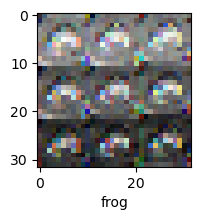

In [32]:
plot_sample(X_train, y_train, 0)

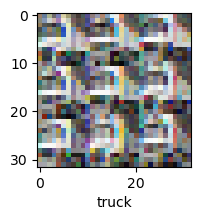

In [33]:
plot_sample(X_train, y_train, 1)

Normalizing traning data from 0 to 1. RGB channels range from 0 to 255

In [34]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [36]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit Model and Iterations

In [37]:
fitted = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
313/313 [==============================] - 28s 84ms/step - loss: 1.9600 - accuracy: 0.2878 - val_loss: 1.8533 - val_accuracy: 0.3415
Epoch 2/10
313/313 [==============================] - 26s 82ms/step - loss: 1.5916 - accuracy: 0.4338 - val_loss: 1.5468 - val_accuracy: 0.4497
Epoch 3/10
313/313 [==============================] - 23s 72ms/step - loss: 1.4412 - accuracy: 0.4888 - val_loss: 1.4903 - val_accuracy: 0.4786
Epoch 4/10
313/313 [==============================] - 22s 70ms/step - loss: 1.3447 - accuracy: 0.5240 - val_loss: 1.4369 - val_accuracy: 0.5006
Epoch 5/10
313/313 [==============================] - 27s 87ms/step - loss: 1.2597 - accuracy: 0.5591 - val_loss: 1.4243 - val_accuracy: 0.5007
Epoch 6/10
313/313 [==============================] - 24s 78ms/step - loss: 1.1835 - accuracy: 0.5826 - val_loss: 1.4105 - val_accuracy: 0.5128
Epoch 7/10
313/313 [==============================] - 24s 77ms/step - loss: 1.1221 - accuracy: 0.6027 - val_loss: 1.4252 - val_accuracy:

Evaluate the Model

In [38]:
test_loss, test_accuracy = cnn.evaluate(X_test,y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.3886 - accuracy: 0.5382


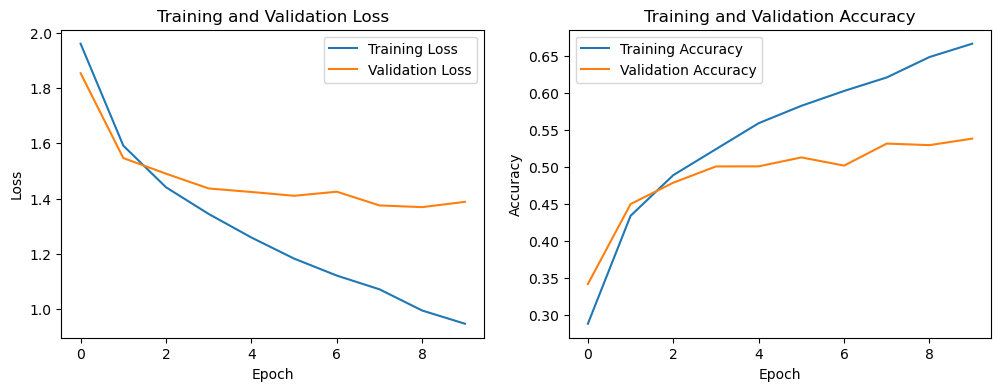

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()